In [2]:
# Import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
# Read the Data

main_frame = pd.read_csv('data/Data_p1.csv', index_col=0)
main_frame.rename(columns={'DEVICEID': 'device', 'vehicleId': 'vehicle', 'PASSDATETIME': 'time'}, inplace=True)
main_frame

,device,vehicle,time
0,101610,40321227460,307695
1,101827,97316881507,307704
2,76431,37948514480,307653
3,74093,86086297520,307671
4,99895,49049583630,307836
...,...,...,...
5999995,37385,41569730560,377095
5999996,43881,60215825530,305667
5999997,43881,60438593730,305544
5999998,42726,67401542877,377055


In [4]:
# Remove Possible Errors
# Remove the vehicles that are seen once

errors_removed_frame = main_frame[(main_frame.groupby('vehicle').size()[main_frame['vehicle']] > 1).values]
errors_removed_frame

,device,vehicle,time
0,101610,40321227460,307695
1,101827,97316881507,307704
2,76431,37948514480,307653
4,99895,49049583630,307836
7,100805,46993588180,307564
...,...,...,...
5999995,37385,41569730560,377095
5999996,43881,60215825530,305667
5999997,43881,60438593730,305544
5999998,42726,67401542877,377055


In [5]:
# Sort based on time

time_sorted_frame = errors_removed_frame.sort_values('time', ascending=True)
time_sorted_frame

,device,vehicle,time
2622957,80015,89604059727,0
1425995,37434,18062963190,0
1754005,100210,61168110204,0
3593889,79168,108852887770,0
4343357,100273,95814345593,1
...,...,...,...
2622959,95856,21902376620,424999
2983737,73799,71467890817,424999
4128513,100154,106018278250,424999
3896285,73743,38111409630,424999


In [6]:
# A Sorted Array of Device IDs

devices = np.unique(time_sorted_frame['device'].values)
devices

array([    12,     19,     26, ..., 108841, 108869, 108897], dtype=int64)

In [7]:
# Group By Vehicle IDs

groupby_vehicle = time_sorted_frame.groupby('vehicle')

In [8]:
# Creating an adjacency matrix of total traffic flow recorded between two devices

total_traffic_flow = pd.DataFrame(np.zeros((len(devices), len(devices))), columns= devices, index=devices)

for group in groupby_vehicle:
    _group_id, data = group
    previous_device_id = None

    for index in range(len(data)):
        if previous_device_id:
            total_traffic_flow[data.iloc[index]['device']][previous_device_id] += 1
        
        previous_device_id = data.iloc[index]['device']
    
print('from \ to')

total_traffic_flow

from \ to


,12,19,26,33,54,61,68,75,82,89,...,108736,108750,108764,108778,108792,108806,108820,108841,108869,108897
12,0.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,2.0,10.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,1.0,0.0,1.0,0.0,1.0,8.0,3.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
108820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
108841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
108869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# Defining a Traffic Flow Map Plotter

def plot_traffic_flow(map_data_frame, title):
    G = nx.from_pandas_edgelist(
        map_data_frame,
        source='from',
        target='to',
        edge_attr='weight'  # Set Edge Attribute to Weight Column
    )

    _fig, ax = plt.subplots()
    pos = nx.circular_layout(G)
    plt.title(title)
    nx.draw_networkx_nodes(G, pos, ax=ax)
    road_widths = np.fromiter(nx.get_edge_attributes(G, 'weight').values(), dtype=float) / 5
    nx.draw_networkx_edges(G, pos, width=road_widths, ax=ax)   # Thicker lines represent heavier flows
    _ = nx.draw_networkx_labels(G, pos, ax=ax)

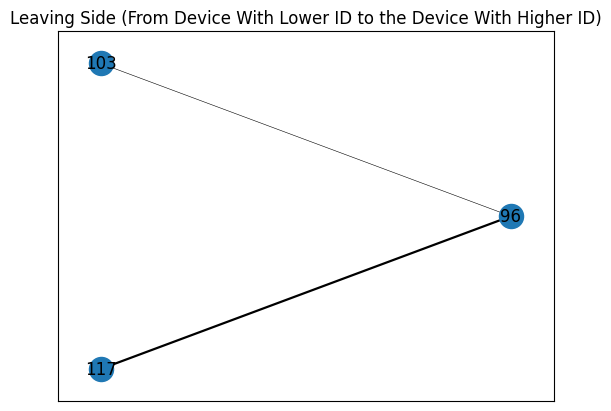

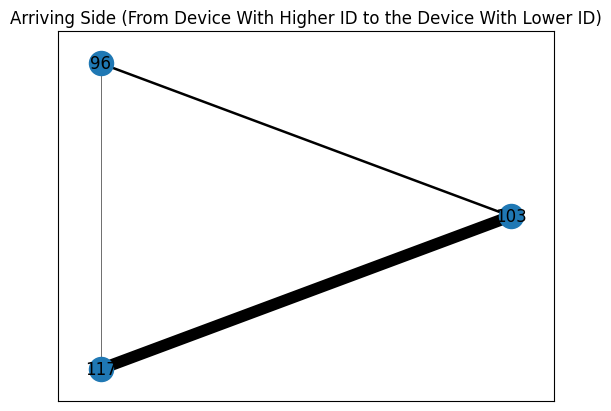

In [61]:
# Plotting a Map of the Total Traffic Flow Between Selected Devices

selected_device_relations = total_traffic_flow.iloc[10:13, 10:13]   # Select a set of devices

from_ = np.repeat(selected_device_relations.index, len(selected_device_relations.index))
to_ = np.repeat(np.array([selected_device_relations.index]), len(selected_device_relations.index), axis=0).flatten()
leaving_weight = np.triu( selected_device_relations.values, k=1).flatten()
arriving_weight = np.tril(selected_device_relations.values, k=-1).flatten()

# Total Departures Recorded For Selected Devices
leaving_side_total = pd.DataFrame({
    'from': from_,
    'to': to_,
    'weight': leaving_weight
})    # From Device With Lower ID to the Device With Higher ID

# Total Arrivings Recorded For Selected Devices
arriving_side_total = pd.DataFrame({
    'from': from_,
    'to': to_,
    'weight': arriving_weight
})    # From Device With Higher ID to the Device With Lower ID

plot_traffic_flow(leaving_side_total[leaving_side_total['weight'] != 0], 'Leaving Side (From Device With Lower ID to the Device With Higher ID)')
plot_traffic_flow(arriving_side_total[arriving_side_total['weight'] != 0], 'Arriving Side (From Device With Higher ID to the Device With Lower ID)')